In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("covid19.csv")
data = data.fillna(0)
data = data.drop(["Source","Unofficial deaths daily"], axis = 1)
data_train = data[["Confirmed daily", "Recovered", "Official deaths daily"]]
data_train = data_train.iloc[-40:,:]

R_obs_w = list(data_train["Confirmed daily"]) + [440, 375, 396]
O_obs_w = list(data_train["Recovered"]) + [299, 122, 157]
Z_obs_w = list(data_train["Official deaths daily"]) + [15,10, 9] # łącznie z 14 czerwca
O_obs_w = O_obs_w[23:]
R_obs_w = R_obs_w[10:]
Z_obs_w= Z_obs_w[19:]
fig, axes = plt.subplots(3,1, sharex=True, figsize=(17, 10))
axes[0].plot(range(len(R_obs_w)), R_obs_w )
axes[1].plot(range(len(O_obs_w)), O_obs_w ,"g")
axes[2].plot(range(len(Z_obs_w)), Z_obs_w, "r" )
plt.show()

print("\n Mean values:\n",data_train.mean())
print("\n Mean values:\n",data_train.iloc[-10:,:].mean())

R_obs_w[-10:]

FileNotFoundError: [Errno 2] File b'covid19.csv' does not exist: b'covid19.csv'

In [35]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt


model_holt_R = Holt(np.reshape(np.array(R_obs_w), (-1,1)))
model_holt_R = model_holt_R.fit()
model_STE_R = SimpleExpSmoothing(np.array(R_obs_w))
model_STE_R = model_STE_R.fit()

model_holt_Z = Holt(Z_obs_w)
model_holt_Z.fit()
model_STE_Z = SimpleExpSmoothing(Z_obs_w)
model_STE_Z.fit()

model_holt_O = Holt(O_obs_w)
model_holt_O.fit()
model_STE_O = SimpleExpSmoothing(O_obs_w)
model_STE_O.fit()

/home/jan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/jan/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


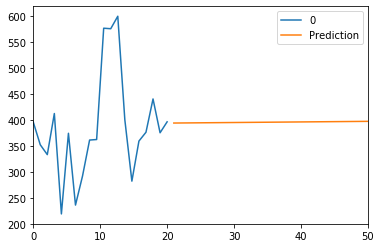

In [36]:
# R forecast
koniec = 20
future = 30
R_forecast = model_holt_R.forecast(future)
R_forecast = pd.DataFrame(R_forecast, index = np.linspace(koniec+1,koniec+future,future),columns=["Prediction"])
pd.concat([pd.DataFrame(R_obs_w[-koniec:],index = np.linspace(0,koniec,koniec)),R_forecast],axis=1).plot()


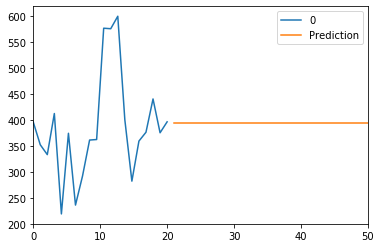

In [25]:
R_forecast = model_STE_R.forecast(future)
R_forecast = pd.DataFrame(R_forecast, index = np.linspace(koniec+1,koniec+future,future),columns=["Prediction"])
pd.concat([pd.DataFrame(R_obs_w[-koniec:],index = np.linspace(0,koniec,koniec)),R_forecast],axis=1).plot()


In [30]:
np.reshape(np.array(R_obs_w), (-1,1))

pd.to_datetime('7/8/2020, dayfirst=True)


array([[411.],
       [401.],
       [241.],
       [272.],
       [356.],
       [382.],
       [471.],
       [403.],
       [472.],
       [316.],
       [361.],
       [341.],
       [443.],
       [396.],
       [352.],
       [333.],
       [412.],
       [219.],
       [374.],
       [236.],
       [292.],
       [361.],
       [362.],
       [576.],
       [575.],
       [599.],
       [400.],
       [282.],
       [359.],
       [376.],
       [440.],
       [375.],
       [396.]])